## K Nearest Neighbors - iris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


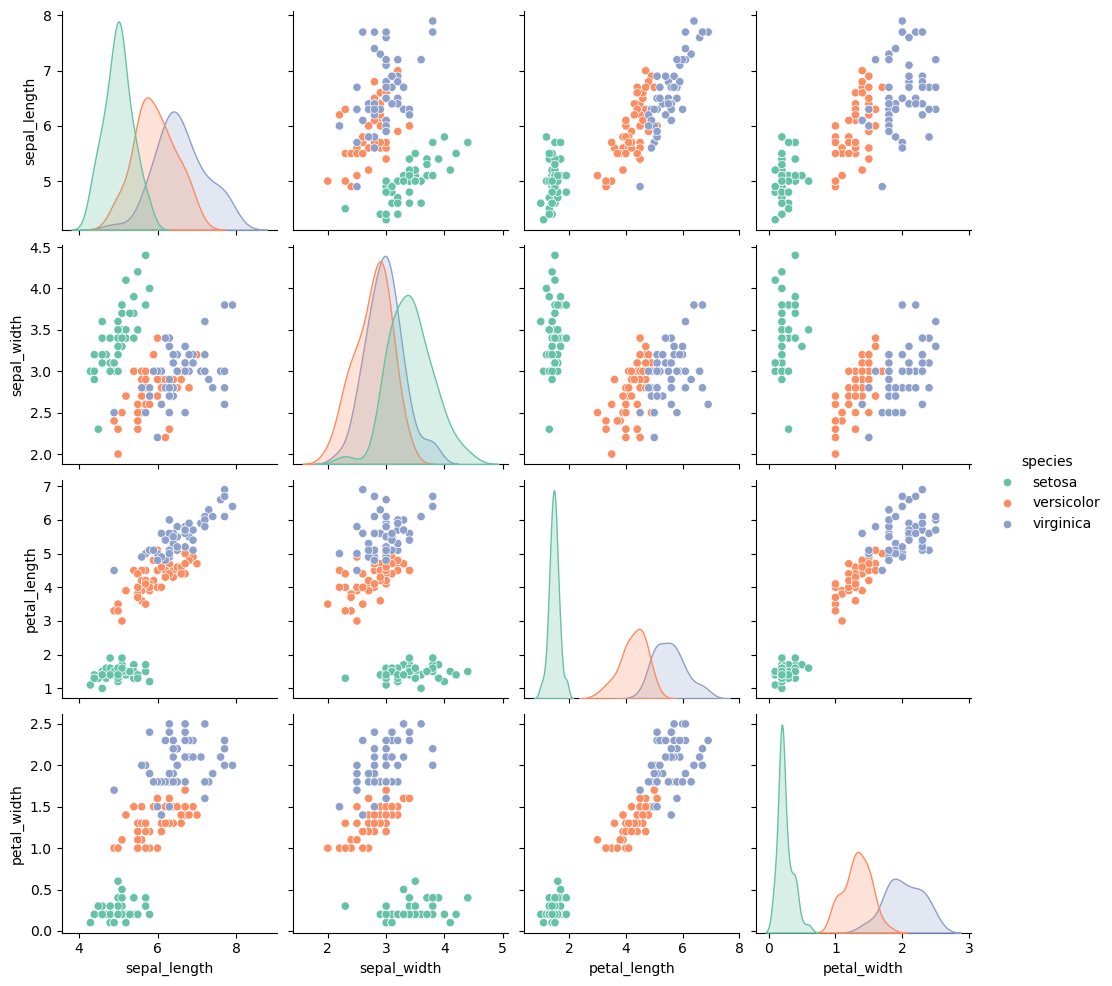

In [4]:
sns.pairplot(iris,hue='species',palette='Set2')

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(iris.drop('species',axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(iris.drop('species',axis=1))

In [8]:
iris_f = pd.DataFrame(scaled_features,columns=iris.columns[:-1])
iris_f.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,iris['species'],
                                                    test_size=0.30)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
pred = knn.predict(X_test)

In [13]:
print(confusion_matrix(y_test,pred))

[[14  1  0]
 [ 0 18  1]
 [ 0  0 11]]


In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      0.93      0.97        15
  versicolor       0.95      0.95      0.95        19
   virginica       0.92      1.00      0.96        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [15]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error Rate')

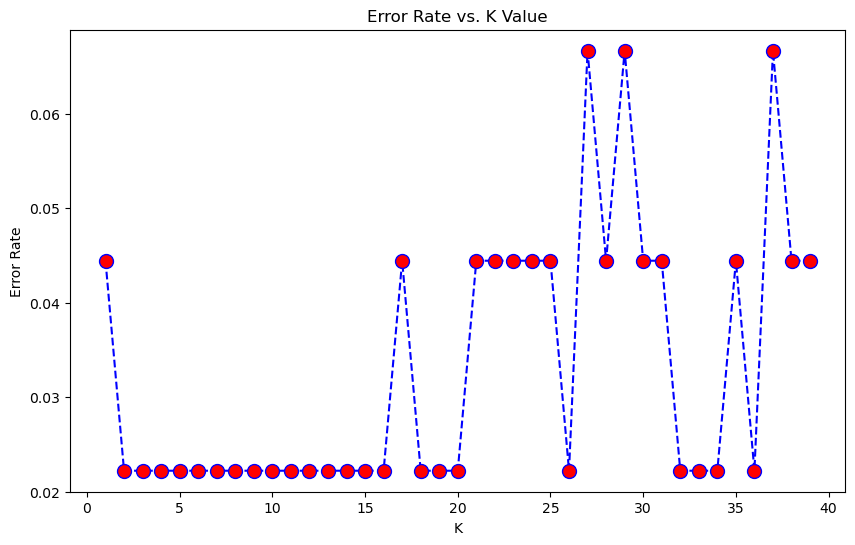

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [17]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[15  0  0]
 [ 0 17  2]
 [ 0  0 11]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.89      0.94        19
   virginica       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



##  THANK YOU